# Feature engineering, xgboost
https://www.kaggle.com/dlarionov/feature-engineering-xgboost


-　DateNum作成 'date_block_num',→YYYYMMで代用
- 祝日フラグ
- month
- days
- アイテムカテゴリ（デフォルト)-> カテゴリCategory、ジャンルType
- 月の売り上げ
### lag01
- 月の売り上げラグ 1,2,3,6,12
- アイテムあたりの「週Or日」平均販売個数 1,2,3,6,12　　'date_item_avg_item_cnt_lag_1',
- ショップあたり「週Or日」平均販売個数ラグ1，2，3，6，12　　'date_shop_avg_item_cnt_lag_1',
- アイテムカテゴリあたり「週Or日」平均販売個数ラグ1,2,3,6,12'date_cat_avg_item_cnt_lag_1',
- カテゴリあたり「週Or日」平均販売個数ラグ1,2,3,6,12，'date_cat_avg_item_cnt_lag_1',
- ジャンル　あたり[月] 平均販売個数ラグ1,2,3,6,12
- アイテムカテゴリ/ショップあたり[月] 平均販売個数ラグ1,2,3,6,12
- カテゴリ/ショップあたり[月] 平均販売個数ラグ1,2,3,6,12
- ジャンル/ショップ　あたり[月] 平均販売個数ラグ1,2,3,6,12
- ASP　月当たり
### lag02
- 価格トレンド　過去6か月
- 店舗売上トレンド
- 価格下落率
- 最終販売日
- 初販売日
- ショップあたりの最終販売日
- ショップあたりの初販売日
    'delta_price_lag',


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [3]:
''' ラグ01（販売個数トレンド+ASP+Revenue58特徴量'''
#lag01 = pd.read_csv('./csv/target_lag01.csv')
'''最終データ'''
data = pd.read_csv('./csv/matrix_final.csv')


"\nttest = pd.merge(test,item_categories, on='ItemId')\nttest = pd.merge(ttest, category_names,on='ItemCategoryId')\nprint('予測データの品目数: ',ttest['ItemId'].nunique(),'\n',\n      '訓練データの品目数: ',sales_history['ItemId'].nunique(),'\n',\n      '予測データのカテゴリ数: ',item_categories['ItemCategoryId'].nunique(),'\n',\n      '訓練データのカテゴリ数: ',ttest['ItemCategoryId'].nunique(),'\n',\n     '売上の総数: ',sales_history['SoldNum'].sum(), '\n',\n     '')\n"

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30600 entries, 0 to 30599
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date_block_num                         30600 non-null  int64  
 1   YYYY                                   30600 non-null  int64  
 2   MM                                     30600 non-null  int64  
 3   StoreId                                30600 non-null  int64  
 4   ItemId                                 30600 non-null  int64  
 5   SoldNum                                30600 non-null  float64
 6   is_holiday                             30600 non-null  float64
 7   ItemCategoryId                         30600 non-null  int64  
 8   Category                               30600 non-null  int64  
 9   Type                                   30600 non-null  int64  
 10  SoldNum_lag_1                          30600 non-null  float64
 11  So

<AxesSubplot:>

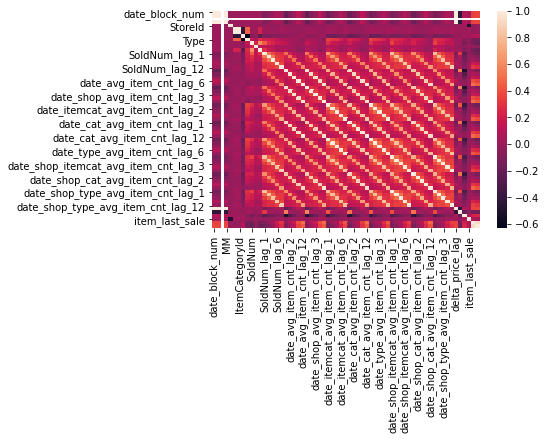

In [4]:
 sns.heatmap(data.corr())

In [5]:
data['date_block_num'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype=int64)

In [6]:
data = data[['date_block_num', 
         'YYYYMM', 
         'YYYY',
         'MM', 
         'StoreId',
         'ItemId',
         'ItemCategoryId', 
         'Category',
         'Type',
         'SoldNum',
         'is_holiday',
         'Revenue', 
         'SoldNum_lag_1',
         'SoldNum_lag_2',
         'SoldNum_lag_3',
         'SoldNum_lag_6', 
         'SoldNum_lag_12', 
         'date_avg_item_cnt_lag_1',
         'date_avg_item_cnt_lag_2',
         'date_avg_item_cnt_lag_3',
         'date_avg_item_cnt_lag_6',
         'date_avg_item_cnt_lag_12',
         'date_shop_avg_item_cnt_lag_1',
         'date_shop_avg_item_cnt_lag_2',
         'date_shop_avg_item_cnt_lag_3', 
         'date_shop_avg_item_cnt_lag_6',
         'date_shop_avg_item_cnt_lag_12', 
         'date_itemcat_avg_item_cnt_lag_1',
         'date_itemcat_avg_item_cnt_lag_2', 
         'date_itemcat_avg_item_cnt_lag_3',
         'date_itemcat_avg_item_cnt_lag_6',
         'date_itemcat_avg_item_cnt_lag_12',
         'date_cat_avg_item_cnt_lag_1',
         'date_cat_avg_item_cnt_lag_2',
         'date_cat_avg_item_cnt_lag_3', 
         'date_cat_avg_item_cnt_lag_6',
         'date_cat_avg_item_cnt_lag_12', 
         'date_type_avg_item_cnt_lag_1',
         'date_type_avg_item_cnt_lag_2', 
         'date_type_avg_item_cnt_lag_3',
         'date_type_avg_item_cnt_lag_6', 
         'date_type_avg_item_cnt_lag_12',
         'date_shop_itemcat_avg_item_cnt_lag_1',
         'date_shop_itemcat_avg_item_cnt_lag_2',
         'date_shop_itemcat_avg_item_cnt_lag_3',
         'date_shop_itemcat_avg_item_cnt_lag_6',
         'date_shop_itemcat_avg_item_cnt_lag_12',
         'date_shop_cat_avg_item_cnt_lag_1', 
         'date_shop_cat_avg_item_cnt_lag_2',
         'date_shop_cat_avg_item_cnt_lag_3', 
         'date_shop_cat_avg_item_cnt_lag_6',
         'date_shop_cat_avg_item_cnt_lag_12',
         'date_shop_type_avg_item_cnt_lag_1',
         'date_shop_type_avg_item_cnt_lag_2',
         'date_shop_type_avg_item_cnt_lag_3',
         'date_shop_type_avg_item_cnt_lag_6',
         'date_shop_type_avg_item_cnt_lag_12', 
         'delta_price_lag',
         'delta_revenue_lag_1',
         'item_shop_last_sale',
         'item_last_sale',
         'item_shop_first_sale',
         'item_first_sale',
        ]]

# XGBoost

In [8]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [11]:
X_train = data[data.date_block_num < 18].drop(['SoldNum'], axis=1)
Y_train = data[data.date_block_num < 18]['SoldNum']
X_valid = data[data.date_block_num == 20].drop(['SoldNum'], axis=1)
Y_valid = data[data.date_block_num == 20]['SoldNum']
X_test = data[data.date_block_num == 21].drop(['SoldNum'], axis=1)

In [12]:
%time
model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
[16:52:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.68783	validation_1-rmse:1.22859
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.64839	validation_1-rmse:1.19268
[2]	validation_0-rmse:1.61581	validation_1-rmse:1.16416
[3]	validation_0-rmse:1.57535	validation_1-rmse:1.13413
[4]	validation_0-rmse:1.55038	validation_1-rmse:1.11215
[5]	validation_0-rmse:1.51909	validation_1-rmse:1.09277
[6]	validation_0-rmse:1.49357	validation_1-rmse:1.07551
[7]	validation_0-rmse:1.47391	validation_1-rmse:1.0608
[8]	validation_0-rmse:1.46073	validation_1-rmse:1.05003
[9]	validation_0-rmse:1.4444	validation_1-rmse:1.03988
[10]	validation_0-rmse:1.43035	validation_1-rmse:1.03095
[11]	validation_0-rmse:1.41826	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=300, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.8, verbosity=1)

In [13]:
Y_pred = model.predict(X_valid)
Y_test = model.predict(X_test)

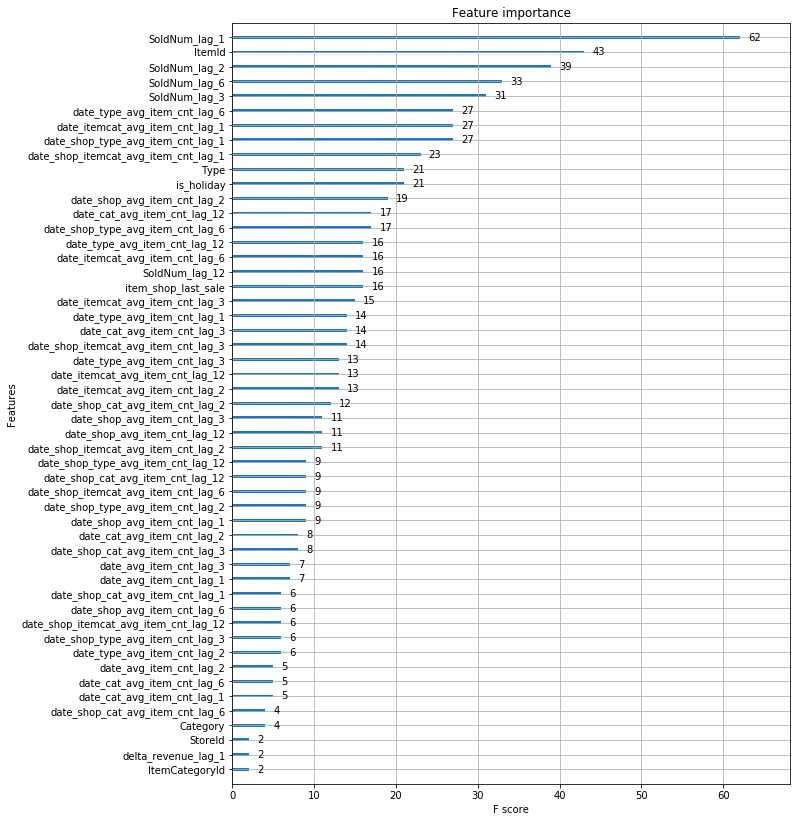

In [14]:
fig,ax = plt.subplots(1,1,figsize=(10,14))
plot_importance(model,ax)

In [34]:
Y_test.shape

(3060,)

In [39]:
sub = pd.DataFrame(Y_test)

In [40]:
sub.to_csv('./sub_xgboost.csv',header=None)